In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls -la "/content/gdrive/My Drive/mf"

total 166511
drwx------ 2 root root      4096 Jul  3 18:05 data
-rw------- 1 root root       201 Jun 28 16:19 obj.data
-rw------- 1 root root         4 Jun 28 16:19 obj.names
-rw------- 1 root root    229231 Jun 29 04:31 output.png
drwx------ 2 root root      4096 Jun 29 02:33 test_images
-rw------- 1 root root        90 Jul  3 17:53 test.txt
-rw------- 1 root root    206808 Jul  3 19:01 train.txt
drwx------ 2 root root      4096 Jul  3 16:45 yolo_model
drwx------ 2 root root      4096 Jul  3 16:45 yolo_model1
-rw------- 1 root root     13341 Apr 22  2021 yolov4.cfg
-rw------- 1 root root 170038676 Apr 22  2021 yolov4.conv.137


In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15442, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 15442 (delta 1), reused 15 (delta 1), pack-reused 15424
Receiving objects: 100% (15442/15442), 14.08 MiB | 21.64 MiB/s, done.
Resolving deltas: 100% (10364/10364), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

In [ ]:
!./darknet detector train "/content/gdrive/My Drive/mf/obj.data" "/content/gdrive/My Drive/mf/yolov4.cfg" "/content/gdrive/My Drive/mf/yolo_model/yolov4_last.weights" -dont_show -map 

Streaming output truncated to the last 5000 lines.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.792402), count: 2, class_loss = 0.098698, iou_loss = 0.423202, total_loss = 0.521900 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.703064), count: 3, class_loss = 0.004288, iou_loss = 0.234473, total_loss = 0.238761 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.000000), count: 1, class_loss = 0.206595, iou_loss = 0.000000, total_loss = 0.206595 
 total_bbox = 338948, rewritten_bbox = 0.000885 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.818747), count: 20, class_loss = 0.799147, iou_loss = 22.458557, total_loss = 23.257704 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.802125), count: 1, class_loss = 0.001842, iou_loss = 0.124010, total_loss = 0.125852 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, c

In [ ]:
!!pip install opencv-python==4.5.1.48

['Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/',
 'Collecting opencv-python==4.5.1.48',
 '  Downloading opencv_python-4.5.1.48-cp37-cp37m-manylinux2014_x86_64.whl (50.4 MB)',
 '\x1b[?25l',
 '\x1b[K     |                                | 10 kB 31.6 MB/s eta 0:00:02',
 '\x1b[K     |                                | 20 kB 41.2 MB/s eta 0:00:02',
 '\x1b[K     |                                | 30 kB 21.2 MB/s eta 0:00:03',
 '\x1b[K     |                                | 40 kB 15.5 MB/s eta 0:00:04',
 '\x1b[K     |                                | 51 kB 12.0 MB/s eta 0:00:05',
 '\x1b[K     |                                | 61 kB 14.1 MB/s eta 0:00:04',
 '\x1b[K     |                                | 71 kB 12.4 MB/s eta 0:00:05',
 '\x1b[K     |                                | 81 kB 13.8 MB/s eta 0:00:04',
 '\x1b[K     |                                | 92 kB 14.0 MB/s eta 0:00:04',
 '\x1b[K     |                                | 102 kB 

predicted class => mf: 0.6693
predicted class => mf: 0.6225


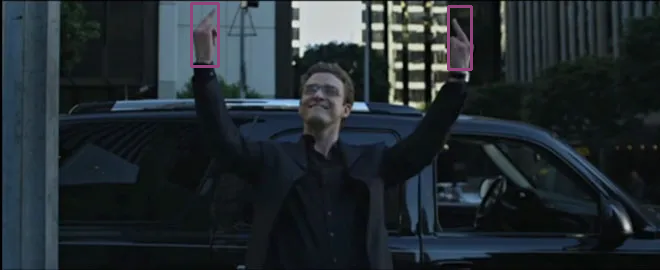

predicted class => mf: 0.8785


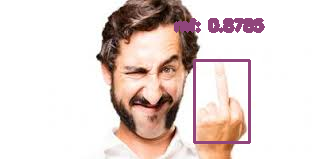

predicted class => mf: 0.8941


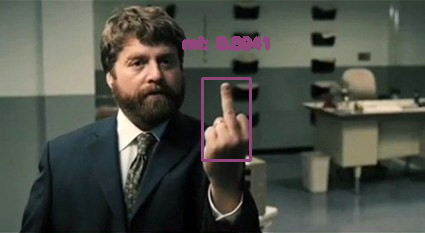

predicted class => mf: 0.9414


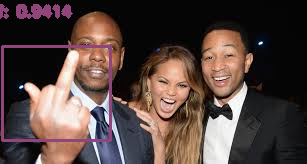

predicted class => mf: 0.6585


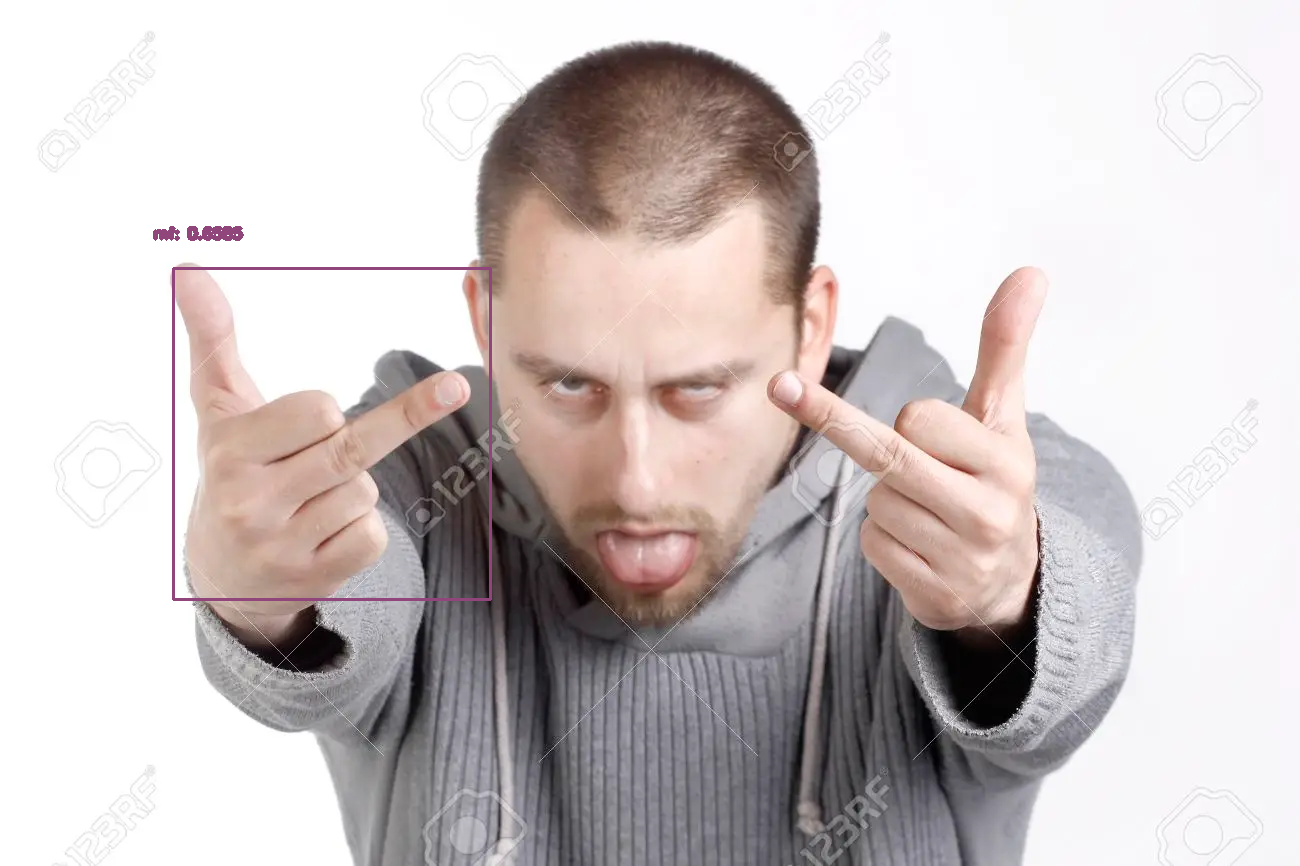

predicted class => mf: 0.4091


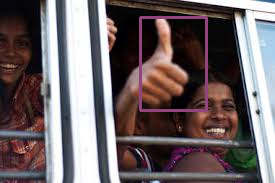

In [ ]:
import numpy as np
import time
import cv2
import glob
from google.colab.patches import cv2_imshow

OUTPUT_FILE='predicted.png'
LABELS_FILE='/content/gdrive/My Drive/mf/obj.names'
CONFIG_FILE='/content/gdrive/My Drive/mf/yolov4.cfg'
WEIGHTS_FILE='/content/gdrive/My Drive/mf/yolo_model/yolov4_2000.weights'
CONFIDENCE_THRESHOLD = 0.1

for fi in glob.glob('/content/gdrive/My Drive/mf/test_images/*'):
  INPUT_FILE=fi
  #INPUT_FILE = input("Please enter the path of the image : ")
  #print(f"You have entered the path => {INPUT_FILE} \n")

  try:
    LABELS = open(LABELS_FILE).read().strip().split("\n")

    np.random.seed(4)
    COLORS = np.random.randint(1, 255, size=(len(LABELS), 3), dtype="uint8")


    net = cv2.dnn.readNetFromDarknet(CONFIG_FILE, WEIGHTS_FILE)

    image = cv2.imread(INPUT_FILE)
    (H, W) = image.shape[:2]

    # determine only the *output* layer names that we need from YOLO
    ln = net.getLayerNames()
    ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]


    blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)
    start = time.time()
    layerOutputs = net.forward(ln)
    end = time.time()


    #print("[INFO] YOLO took {:.6f} seconds".format(end - start))


    # initialize our lists of detected bounding boxes, confidences, and
    # class IDs, respectively
    boxes = []
    confidences = []
    classIDs = []

    # loop over each of the layer outputs
    for output in layerOutputs:
      # loop over each of the detections
      for detection in output:
        # extract the class ID and confidence (i.e., probability) of
        # the current object detection
        scores = detection[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]

        # filter out weak predictions by ensuring the detected
        # probability is greater than the minimum probability
        if confidence > CONFIDENCE_THRESHOLD:
          # scale the bounding box coordinates back relative to the
          # size of the image, keeping in mind that YOLO actually
          # returns the center (x, y)-coordinates of the bounding
          # box followed by the boxes' width and height
          box = detection[0:4] * np.array([W, H, W, H])
          (centerX, centerY, width, height) = box.astype("int")

          # use the center (x, y)-coordinates to derive the top and
          # and left corner of the bounding box
          x = int(centerX - (width / 2))
          y = int(centerY - (height / 2))

          # update our list of bounding box coordinates, confidences,
          # and class IDs
          boxes.append([x, y, int(width), int(height)])
          confidences.append(float(confidence))
          classIDs.append(classID)

    # apply non-maxima suppression to suppress weak, overlapping bounding
    # boxes
    idxs = cv2.dnn.NMSBoxes(boxes, confidences, CONFIDENCE_THRESHOLD,
      CONFIDENCE_THRESHOLD)

    # ensure at least one detection exists
    if len(idxs) > 0:
      # loop over the indexes we are keeping
      for i in idxs.flatten():
        # extract the bounding box coordinates
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])

        color = [int(c) for c in COLORS[classIDs[i]]]

        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
        print(f'predicted class => {text}')
        cv2.putText(image, text, (x-20, y - 30), cv2.FONT_HERSHEY_SIMPLEX,
          0.5, color, 3)

      # show the output image
      
      
      cv2.imwrite('/content/gdrive/My Drive/mf/output.png', image)
      cv2_imshow(image)
  except Exception as e:
    print("Exception while predicting", e)